In [265]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [266]:
df = pd.read_csv("Thyroid_Diff.csv")

In [267]:
for column in df.columns:
    print(df[column].unique())

[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
['F' 'M']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
['Uni-Focal' 'Multi-Focal']
['Low' 'Intermediate' 'High']
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
['N0' 'N1b' 'N1a']
['M0' 'M1']
['I' 'II' 'IVB' 'III' 'IVA']
['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
['No' 'Yes']


In [268]:
# label_encoder_sex = LabelEncoder()
# label_encoder_bp = LabelEncoder()
# label_encoder_chol = LabelEncoder()
# label_encoder_drug = LabelEncoder()

# df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])
# df['BP'] = label_encoder_bp.fit_transform(df['BP'])
# df['Cholesterol'] = label_encoder_chol.fit_transform(df['Cholesterol'])
# df['Drug'] = label_encoder_drug.fit_transform(df['Drug'])

In [269]:
label_encoders = {
    'Gender': LabelEncoder(),
    'Smoking': LabelEncoder(),
    'Hx Smoking': LabelEncoder(),
    'Hx Radiothreapy': LabelEncoder(),
    'Thyroid Function': LabelEncoder(),
    'Physical Examination': LabelEncoder(),
    'Adenopathy': LabelEncoder(),
    'Pathology': LabelEncoder(),
    'Focality': LabelEncoder(),
    'Risk': LabelEncoder(),
    'T': LabelEncoder(),
    'N': LabelEncoder(),
    'M': LabelEncoder(),
    'Stage': LabelEncoder(),
    'Response': LabelEncoder(),
    'Recurred': LabelEncoder()
}

for column, encoder in label_encoders.items():
    df[column] = label_encoders[column].fit_transform(df[column])


In [270]:
# features = ['Age', 'Sex','BP','Cholesterol','Na_to_K']
# class_label = "Drug"
# X = df.loc[:,features]
# y = df.loc[:,class_label]

In [271]:
X = df.drop("Recurred",axis=1)
y = df["Recurred"]

In [272]:
RANDOM_STATE = 100
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=RANDOM_STATE,test_size=0.2,stratify=y)

In [273]:
# for depth in range(1,5):
#     model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
#     model.fit(X_train,y_train)
#     print(f'{model.predict_proba(X_test)}')
#     print(f'\n{model.predict(X_test)}')
#     print(f'\nCurrent Depth = {depth}\n')
# print(y_test.values)

In [274]:
fig_size = (8,8)

In [275]:
# Initialize lists to store F1 scores for training and testing sets
def pre_pruning_depth(criteria,X_train,X_test,y_train,y_test,savefig):
    depths = range(1, 9)
    train_f1_scores = []
    test_f1_scores = []
    clf=DecisionTreeClassifier(criterion=criteria,random_state=RANDOM_STATE)
    # Loop through each depth value
    for depth in depths:
        # Set the depth parameter
        clf.set_params(max_depth=depth)
        
        # Train the decision tree on the training set
        clf.fit(X_train, y_train)
        
        # Predict the training set labels
        train_predictions = clf.predict(X_train)
        
        # Predict the testing set labels
        test_predictions = clf.predict(X_test)
        
        # Calculate F1 scores for training and testing sets
        train_f1 = f1_score(y_train, train_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        
        # Append F1 scores to the lists
        train_f1_scores.append(train_f1)
        test_f1_scores.append(test_f1)
        # Print F1 scores with respective depths
        print(f"Depth: {depth}, Training F1 Score: {train_f1}, Testing F1 Score: {test_f1}")

    # Plot F1 scores vs depth
    plt.figure(figsize=fig_size)
    plt.plot(depths, train_f1_scores, label='Training F1 Score')
    plt.plot(depths, test_f1_scores, label='Testing F1 Score')
    plt.xlabel('Depth')
    plt.ylabel('F1 Score')
    plt.xticks(depths)
    plt.legend()
    plt.grid(True)
    if savefig:
        plt.savefig(f'F1 Score vs Depth for Decision Tree {criteria}')
    else:
        plt.title(f'F1 Score vs Depth for Decision Tree {criteria}')
    plt.show()
    max_f1_score= max(test_f1_scores)
    optimal_depth = test_f1_scores.index(max_f1_score) + 1
    clf_optimal_depth=DecisionTreeClassifier(criterion=criteria,max_depth=optimal_depth,random_state=RANDOM_STATE)
    clf_optimal_depth.fit(X_train,y_train)
    plt.figure(figsize=fig_size)
    class_names = [str(cls) for cls in clf_optimal_depth.classes_]
    tree.plot_tree(clf_optimal_depth, feature_names=X.columns, class_names=class_names, filled=True)
    if savefig:
        plt.savefig(f'Decision Tree {criteria} depth {optimal_depth}')
    else:
        plt.title(f'Decision Tree {criteria} depth {optimal_depth}')
    plt.show()
    prediction = clf_optimal_depth.predict(X_test)
    cm = confusion_matrix(prediction,y_test)
    plt.figure(figsize=fig_size)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                # xticklabels=['Predicted_Drug_Y', 'Predicted_Drug_C','Predicted_Drug_X','Predicted_Drug_A','Predicted_Drug_B'],
                # yticklabels=['Actual_Drug_Y', 'Actual_Drug_C','Actual_Drug_X','Actual_Drug_A','Actual_Drug_B'])
                xticklabels=['Predicted_yes','Predicted_no'],
                yticklabels=["Actual_yes","Actual_no"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if savefig:
        plt.savefig(f'Confusion Matrix depth {optimal_depth} {criteria}')
    else:
        plt.title(f'Confusion Matrix depth {optimal_depth} {criteria}')
    plt.show()
    

In [276]:
# Get the cost complexity pruning path
def post_pruning_optimal_alpha(criteria,X_train,X_test,y_train,y_test,savefig):
    clf = DecisionTreeClassifier(criterion=criteria,random_state=RANDOM_STATE)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    impurities = path.impurities

    # Plot the total impurity vs effective alpha
    plt.figure(figsize=fig_size)
    plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
    plt.xlabel("Effective Alpha")
    plt.ylabel("Total Impurity of Leaves")
    if savefig:
        plt.savefig(f"Total Impurity vs Effective Alpha{criteria}")
    else:
        plt.title(f"Total Impurity vs Effective Alpha{criteria}")
    plt.show()
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion = criteria, ccp_alpha=ccp_alpha,random_state=RANDOM_STATE)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    # Plot the number of nodes vs alpha
    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]
    plt.figure(figsize=fig_size)
    plt.plot(ccp_alphas[:-1], node_counts[:-1], marker='o', drawstyle='steps-post', label='Number of Nodes')
    plt.plot(ccp_alphas[:-1], depth[:-1], marker='o', drawstyle='steps-post', label='Max Depth')
    plt.xlabel("Effective Alpha")
    plt.ylabel("Number of Nodes / Max Depth")
    plt.legend()
    if savefig:
        plt.savefig(f"Number of Nodes and Depth vs Effective Alpha {criteria}")
    else:
        plt.title(f"Number of Nodes and Depth vs Effective Alpha {criteria}")
    plt.show()
    train_scores = [f1_score(y_train, clf.predict(X_train)) for clf in clfs]
    test_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]

    # Plot accuracy vs alpha
    plt.figure(figsize=fig_size)
    plt.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='Train', drawstyle='steps-post')
    plt.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='Test', drawstyle='steps-post')
    plt.xlabel("Effective Alpha")
    plt.ylabel("F1 Score")
    plt.legend()
    if savefig:
        plt.savefig(f"F1 Score vs Effective Alpha {criteria}")
    else:
        plt.title(f"F1 Score vs Effective Alpha {criteria}")
    plt.show()
    optimal_alpha = ccp_alphas[np.argmax(test_scores)]
    optimal_clf = DecisionTreeClassifier(criterion=criteria,ccp_alpha=optimal_alpha)
    optimal_clf.fit(X_train, y_train)

    # Print the optimal alpha and its corresponding accuracy
    plt.figure(figsize=fig_size)
    class_names = [str(cls) for cls in optimal_clf.classes_]
    tree.plot_tree(optimal_clf, feature_names=X.columns, class_names=class_names, filled=True)
    if savefig:
        plt.savefig(f"Decision Tree {criteria} alpha {int(optimal_alpha*10000)}")
    else:
        plt.title(f"Decision Tree {criteria} alpha {int(optimal_alpha*10000)}")
    plt.show()
    prediction = optimal_clf.predict(X_test)
    cm = confusion_matrix(prediction,y_test)
    plt.figure(figsize=fig_size)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                # xticklabels=['Predicted_Drug_Y', 'Predicted_Drug_C','Predicted_Drug_X','Predicted_Drug_A','Predicted_Drug_B'],
                # yticklabels=['Actual_Drug_Y', 'Actual_Drug_C','Actual_Drug_X','Actual_Drug_A','Actual_Drug_B'])
                xticklabels=['Predicted_yes','Predicted_no'],
                yticklabels=["Actual_yes","Actual_no"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if savefig:
        plt.savefig(f'Confusion Matrix alpha {int(optimal_alpha*10000)} {criteria}')
    else:
        plt.title(f'Confusion Matrix alpha {int(optimal_alpha*10000)} {criteria}')
    plt.show()

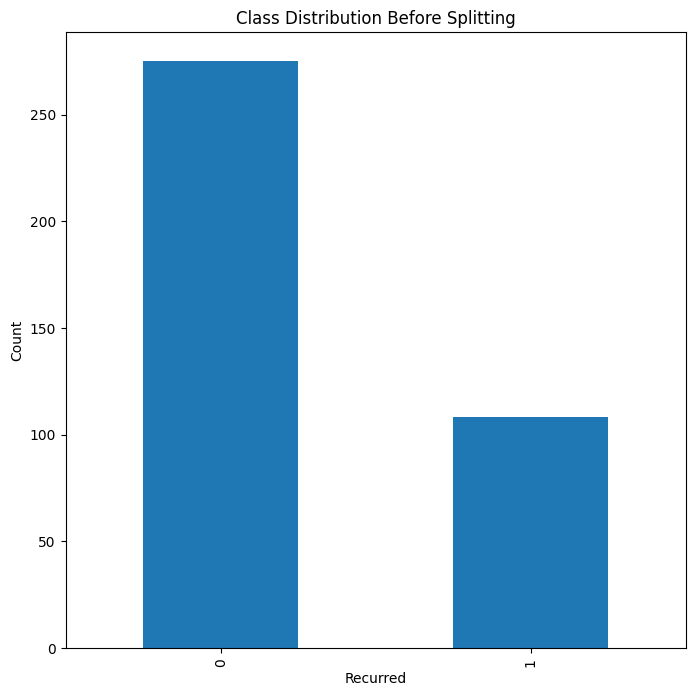

Recurred
0    275
1    108
Name: count, dtype: int64


In [277]:
# plt.figure(figsize=(10, 6))
# df['Drug'].value_counts().plot(kind='bar')
# plt.title('Class Distribution Before Splitting')
# plt.xlabel('Drug')
# plt.ylabel('Count')
# plt.show()
plt.figure(figsize=fig_size)
df['Recurred'].value_counts().plot(kind='bar')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.title('Class Distribution Before Splitting')
plt.show()
print(df['Recurred'].value_counts())

In [278]:
def plot_tree(savefig):
    criterias = ['entropy','gini','log_loss']
    for criteria in criterias:
        model = DecisionTreeClassifier(criterion=criteria,random_state=RANDOM_STATE)
        model.fit(X_train,y_train)
        plt.figure(figsize=(15, 10))
        class_names = [str(cls) for cls in model.classes_]
        tree.plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
        if savefig:
            plt.savefig(f'Decision Tree {criteria}')
        else:
            plt.title(f'Decision Tree {criteria}')
        plt.show()
        prediction = model.predict(X_test)
        print(prediction)
        print(np.array(y_test))
        prediction_true_false = [prediction[i]==np.array(y_test)[i] for i in range(0,len(prediction))]
        print(np.array(prediction_true_false))
        cm = confusion_matrix(prediction,y_test)
        plt.figure(figsize=fig_size)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    # xticklabels=['Predicted_Drug_Y', 'Predicted_Drug_C','Predicted_Drug_X','Predicted_Drug_A','Predicted_Drug_B'],
                    # yticklabels=['Actual_Drug_Y', 'Actual_Drug_C','Actual_Drug_X','Actual_Drug_A','Actual_Drug_B'])
                    xticklabels=['Predicted_yes','Predicted_no'],
                    yticklabels=["Actual_yes","Actual_no"])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        if savefig:
            plt.savefig(f'Confusion Matrix {criteria}')
        else:
            plt.title(f'Confusion Matrix {criteria}')
        plt.show()
        report = classification_report(y_test, prediction)
        print(report)
        pre_pruning_depth(criteria,X_train,X_test,y_train,y_test,savefig)
        post_pruning_optimal_alpha(criteria,X_train,X_test,y_train,y_test,savefig)
        print("\n----------------------------------------------------------------------------------\n")

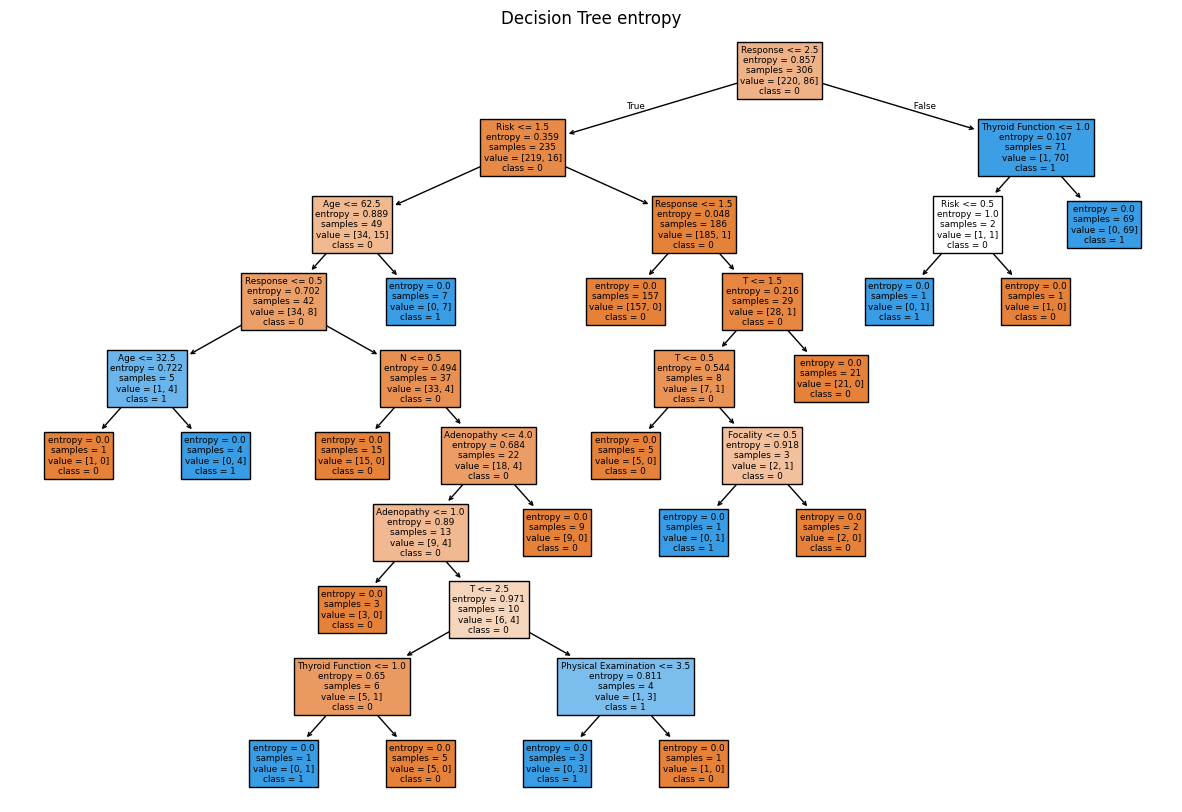

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0]
[0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0]
[ True False  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True]


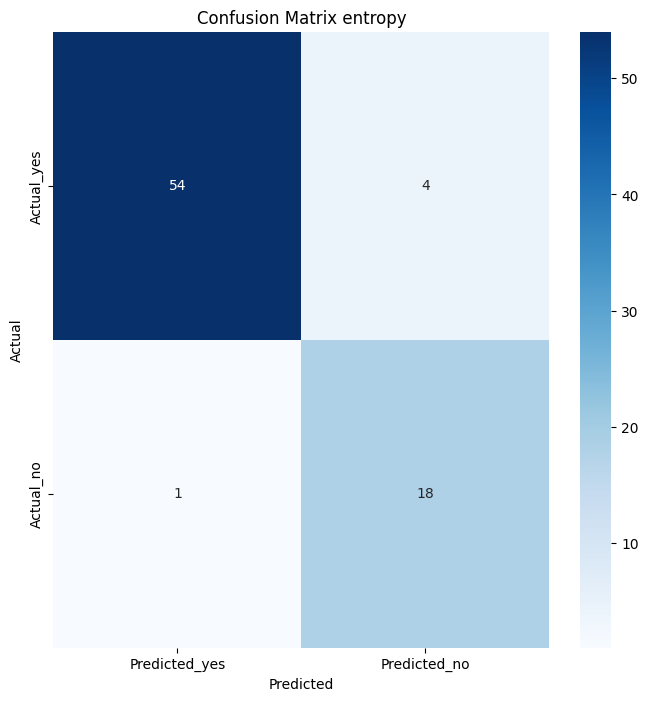

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.82      0.88        22

    accuracy                           0.94        77
   macro avg       0.94      0.90      0.92        77
weighted avg       0.94      0.94      0.93        77

Depth: 1, Training F1 Score: 0.89171974522293, Testing F1 Score: 0.9047619047619048
Depth: 2, Training F1 Score: 0.8903225806451613, Testing F1 Score: 0.85
Depth: 3, Training F1 Score: 0.9447852760736196, Testing F1 Score: 0.8780487804878049
Depth: 4, Training F1 Score: 0.9642857142857143, Testing F1 Score: 0.8780487804878049
Depth: 5, Training F1 Score: 0.9700598802395209, Testing F1 Score: 0.9047619047619048
Depth: 6, Training F1 Score: 0.9761904761904762, Testing F1 Score: 0.8780487804878049
Depth: 7, Training F1 Score: 0.9761904761904762, Testing F1 Score: 0.8780487804878049
Depth: 8, Training F1 Score: 0.9883720930232558, Testing F1 Score: 0.8571428571428571


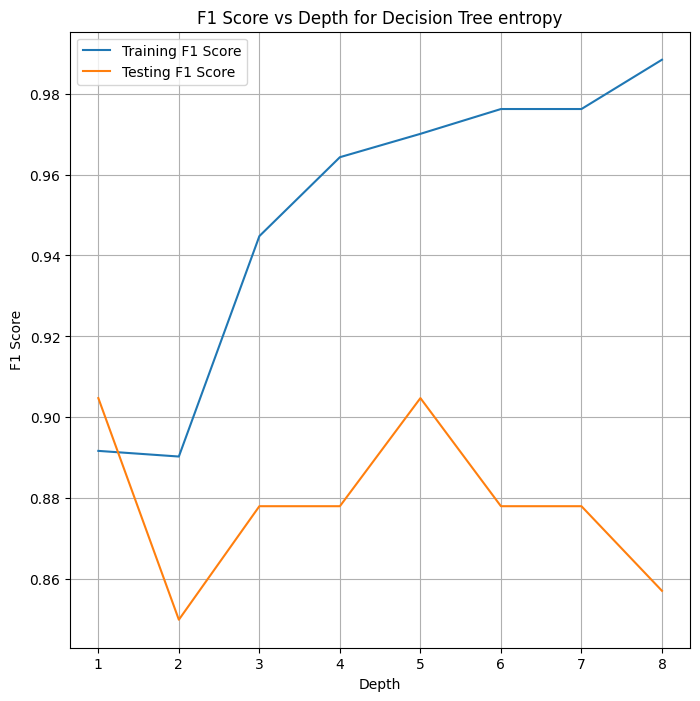

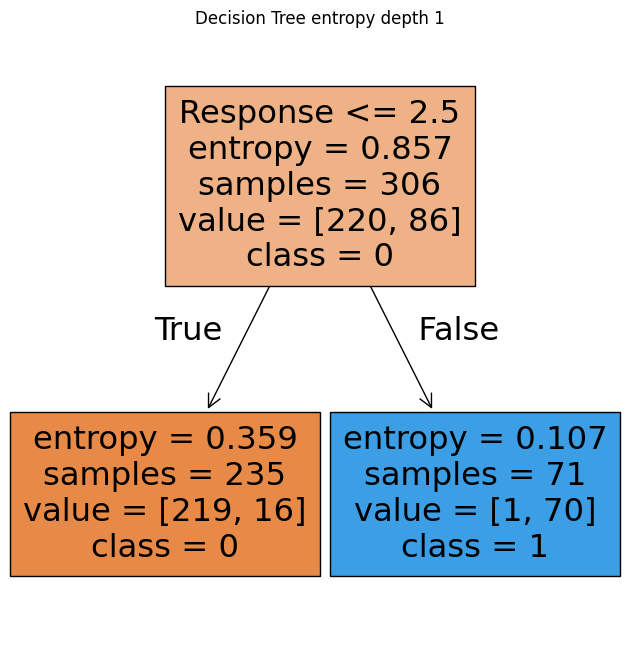

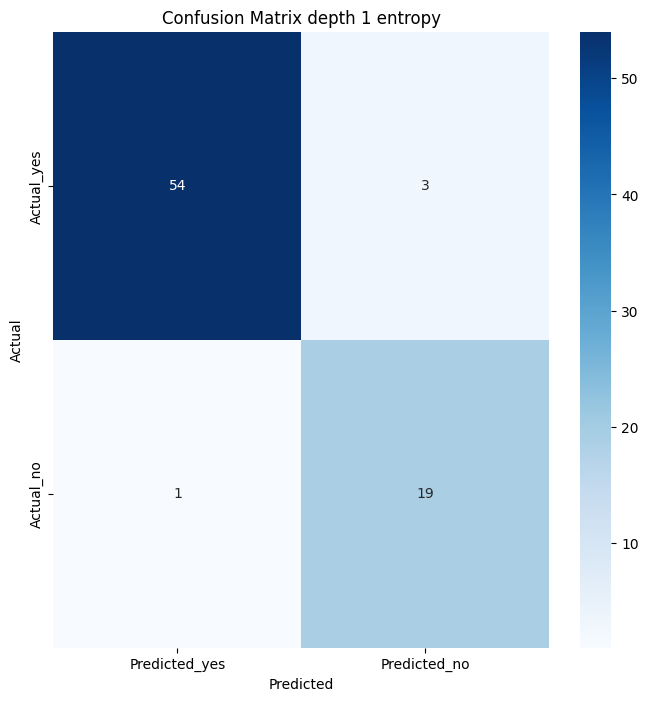

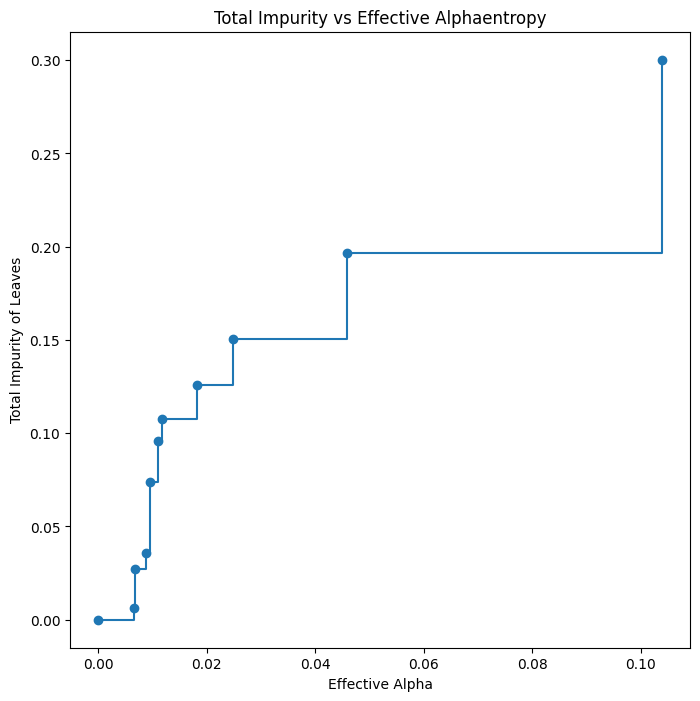

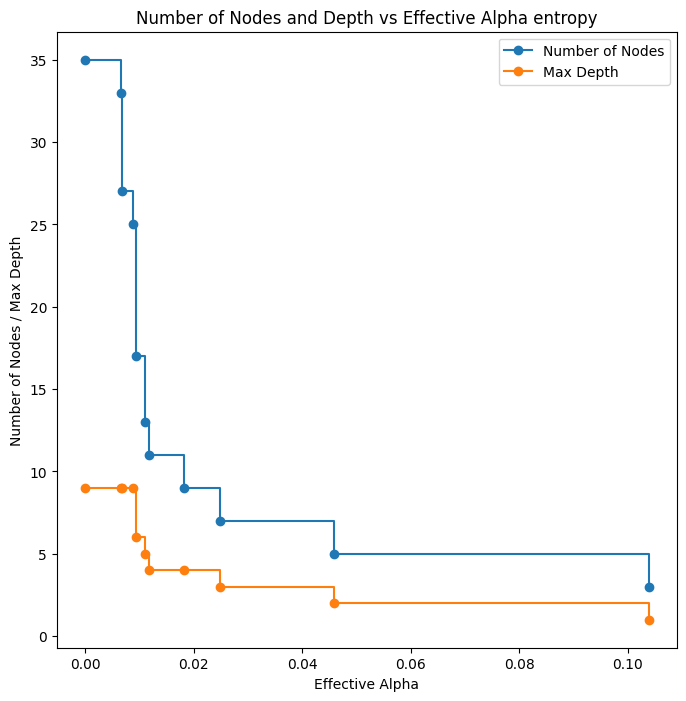

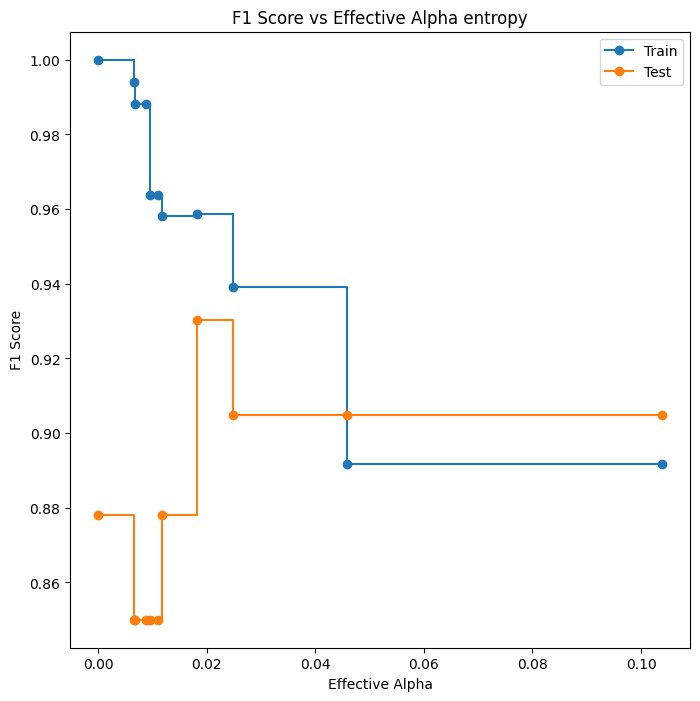

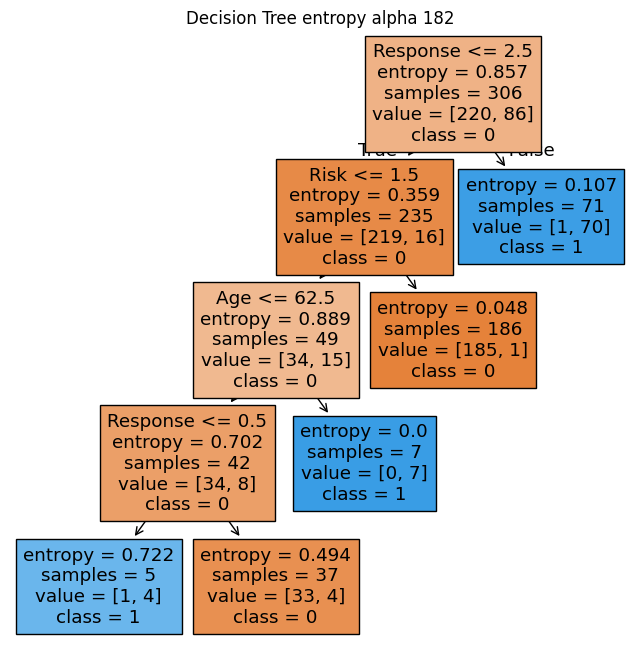

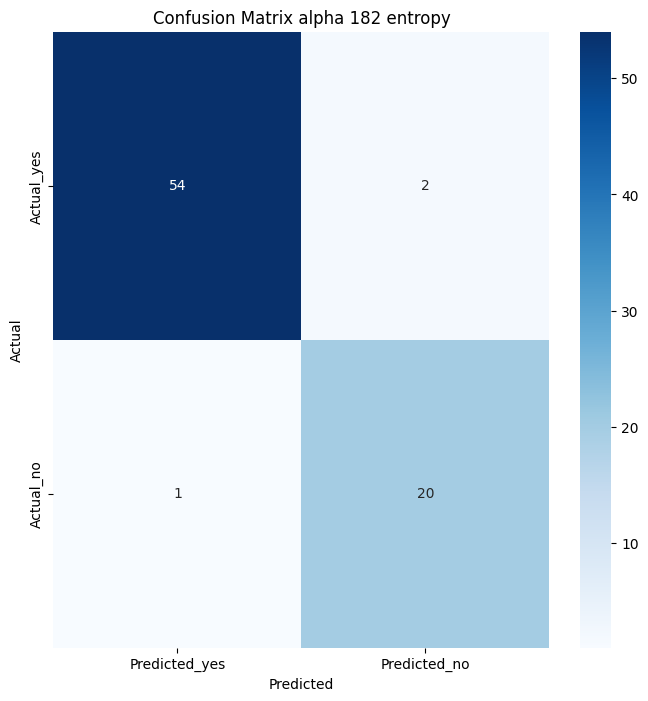


----------------------------------------------------------------------------------



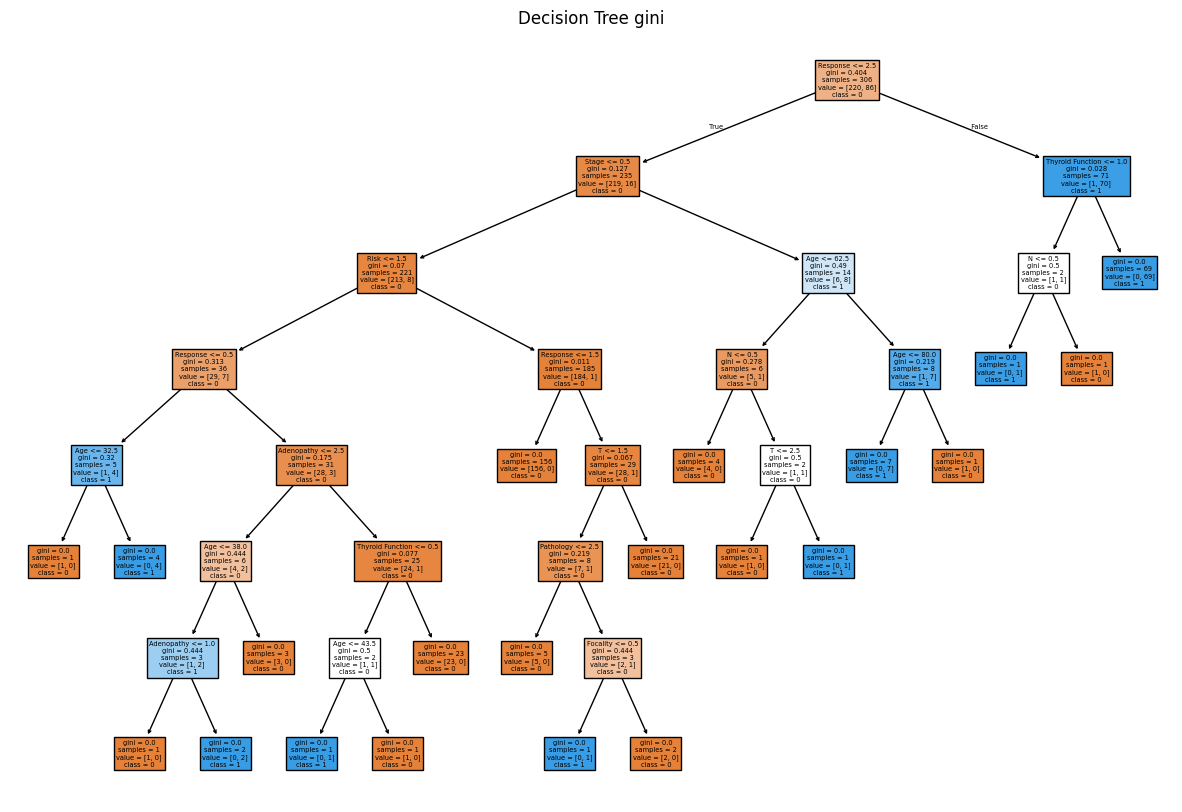

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0]
[0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0]
[ True False  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True]


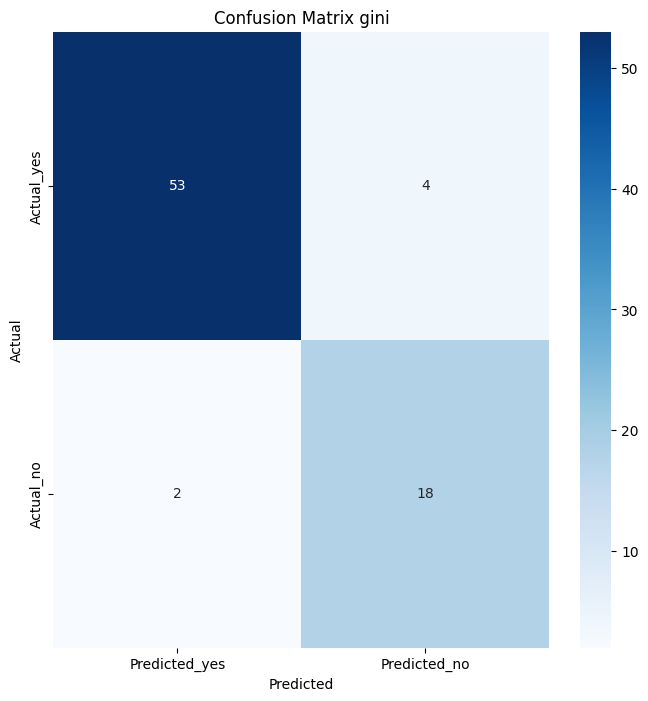

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.90      0.82      0.86        22

    accuracy                           0.92        77
   macro avg       0.91      0.89      0.90        77
weighted avg       0.92      0.92      0.92        77

Depth: 1, Training F1 Score: 0.89171974522293, Testing F1 Score: 0.9047619047619048
Depth: 2, Training F1 Score: 0.9112426035502958, Testing F1 Score: 0.8292682926829268
Depth: 3, Training F1 Score: 0.9390243902439024, Testing F1 Score: 0.9047619047619048
Depth: 4, Training F1 Score: 0.9642857142857143, Testing F1 Score: 0.9302325581395349
Depth: 5, Training F1 Score: 0.9761904761904762, Testing F1 Score: 0.8837209302325582
Depth: 6, Training F1 Score: 0.9824561403508771, Testing F1 Score: 0.8372093023255814
Depth: 7, Training F1 Score: 1.0, Testing F1 Score: 0.8571428571428571
Depth: 8, Training F1 Score: 1.0, Testing F1 Score: 0.8571428571428571


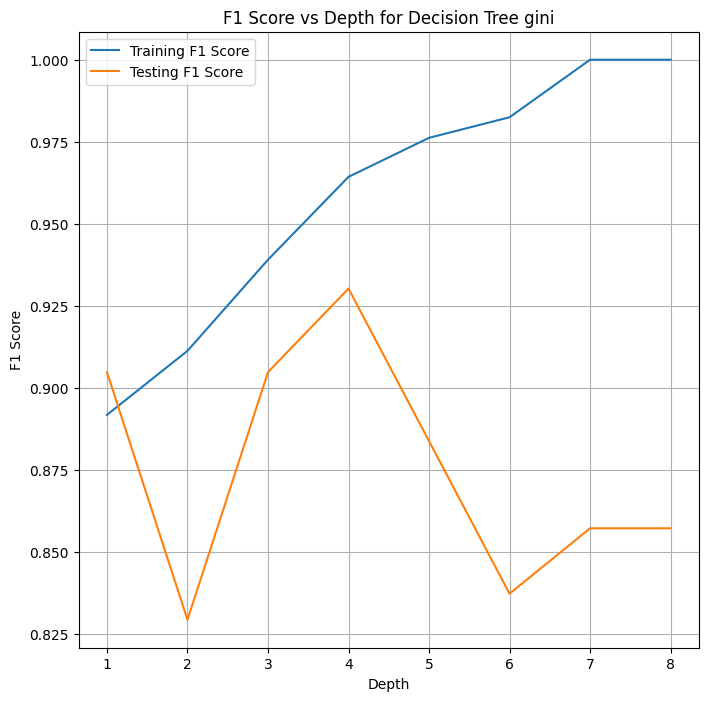

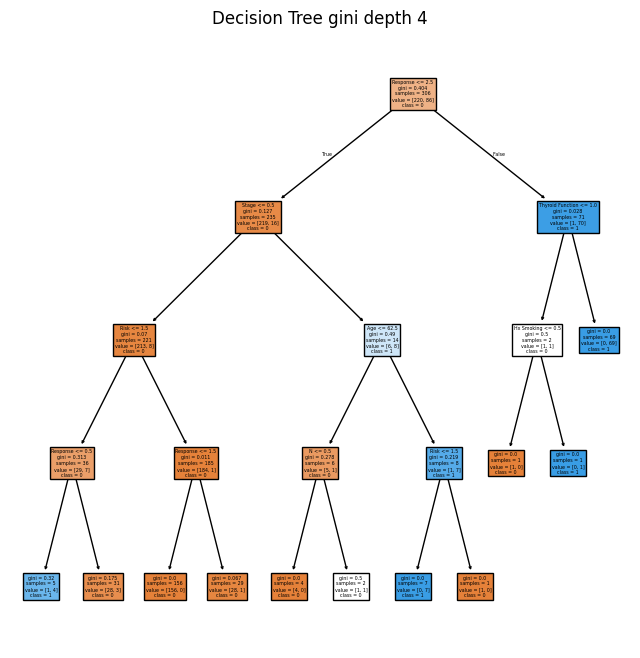

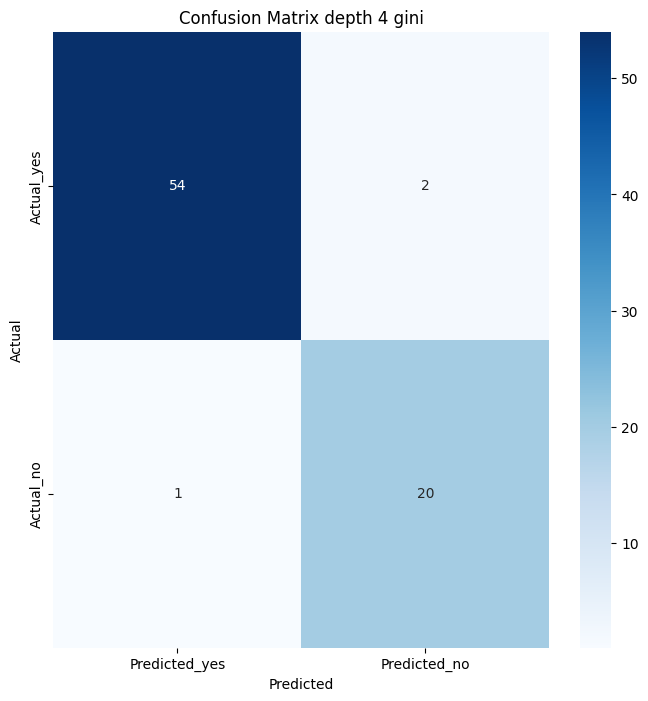

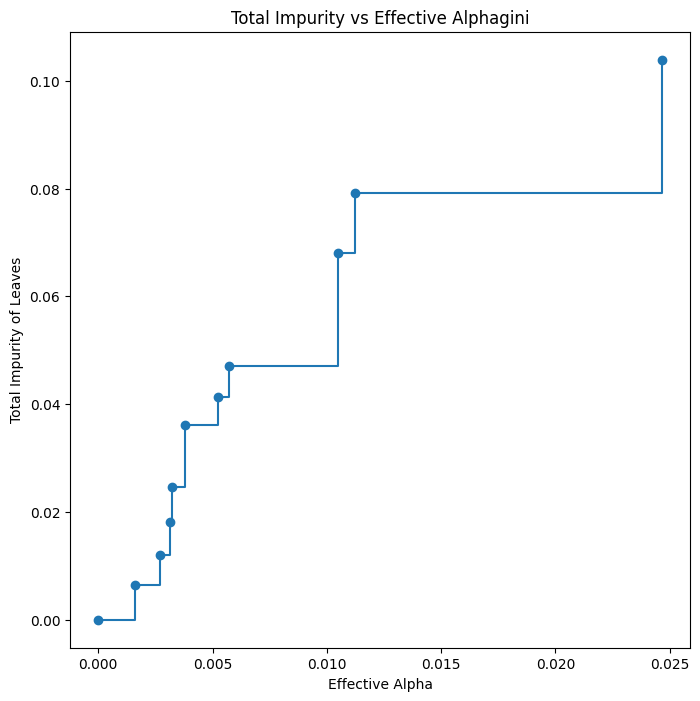

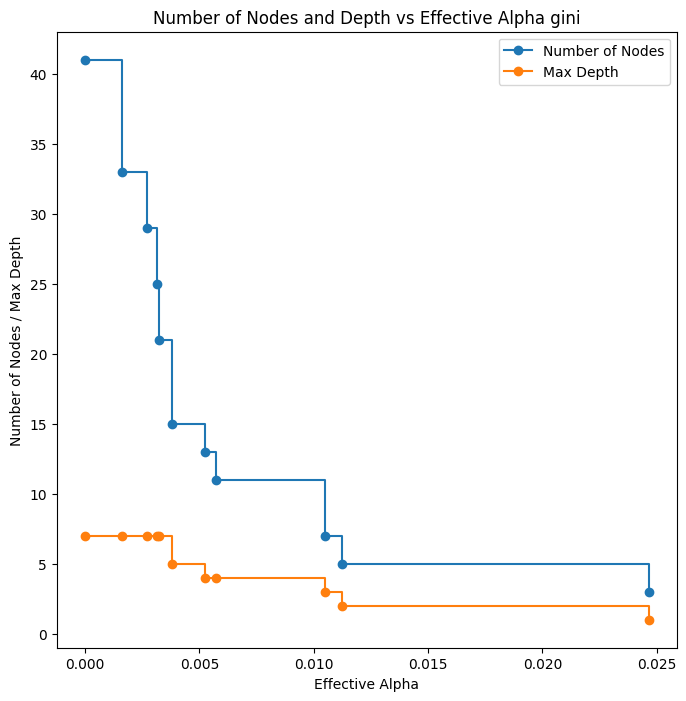

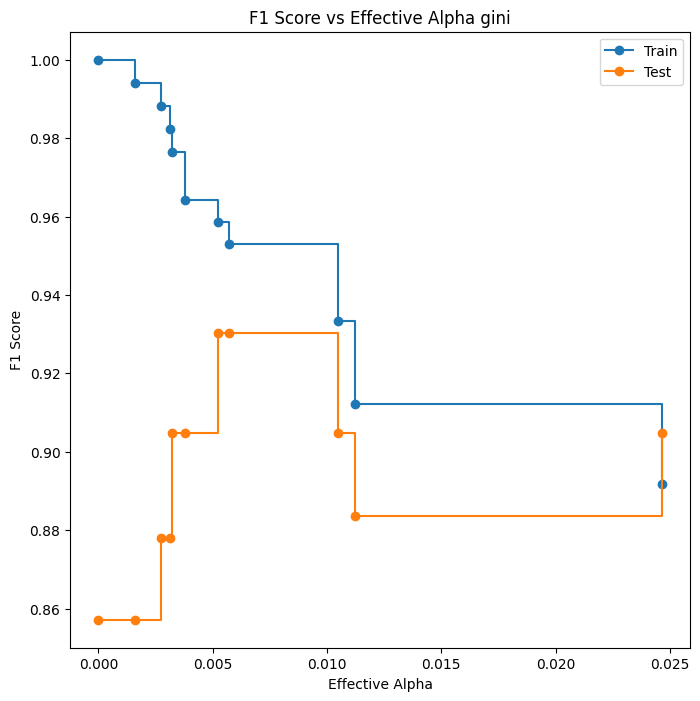

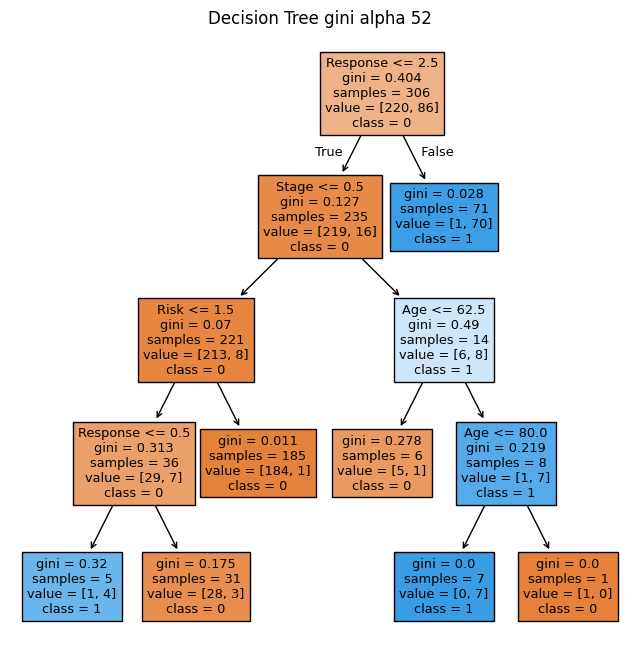

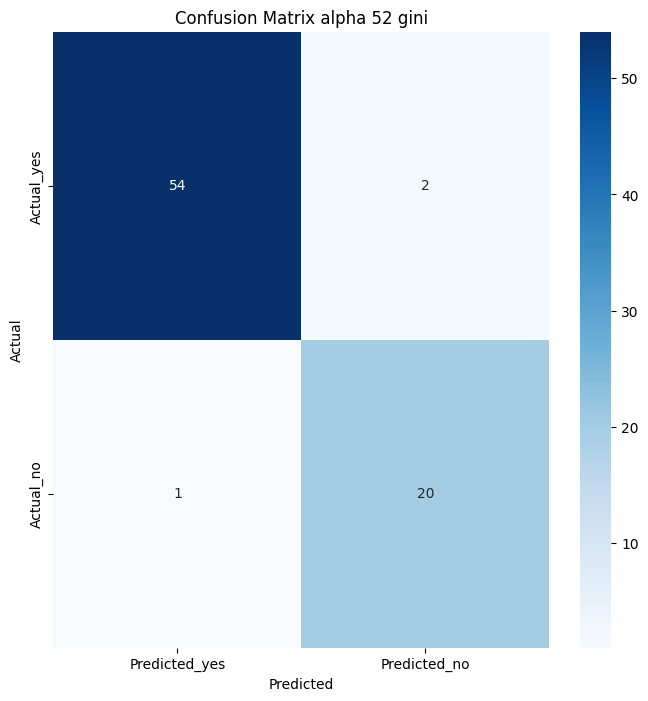


----------------------------------------------------------------------------------



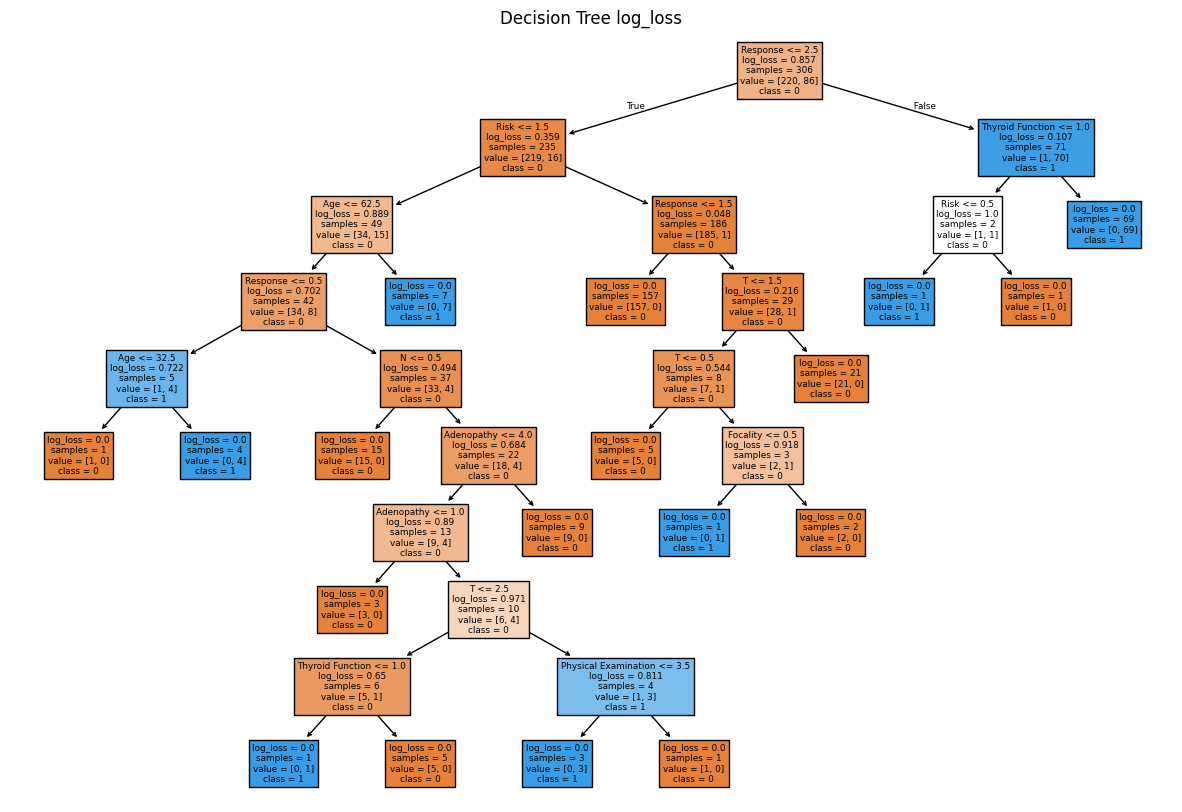

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0]
[0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0]
[ True False  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True]


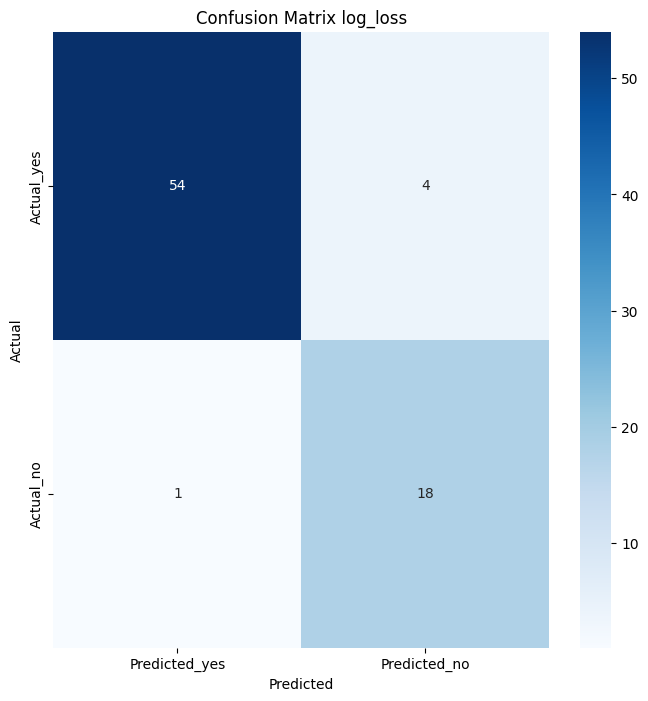

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.82      0.88        22

    accuracy                           0.94        77
   macro avg       0.94      0.90      0.92        77
weighted avg       0.94      0.94      0.93        77

Depth: 1, Training F1 Score: 0.89171974522293, Testing F1 Score: 0.9047619047619048
Depth: 2, Training F1 Score: 0.8903225806451613, Testing F1 Score: 0.85
Depth: 3, Training F1 Score: 0.9447852760736196, Testing F1 Score: 0.8780487804878049
Depth: 4, Training F1 Score: 0.9642857142857143, Testing F1 Score: 0.8780487804878049
Depth: 5, Training F1 Score: 0.9700598802395209, Testing F1 Score: 0.9047619047619048
Depth: 6, Training F1 Score: 0.9761904761904762, Testing F1 Score: 0.8780487804878049
Depth: 7, Training F1 Score: 0.9761904761904762, Testing F1 Score: 0.8780487804878049
Depth: 8, Training F1 Score: 0.9883720930232558, Testing F1 Score: 0.8571428571428571


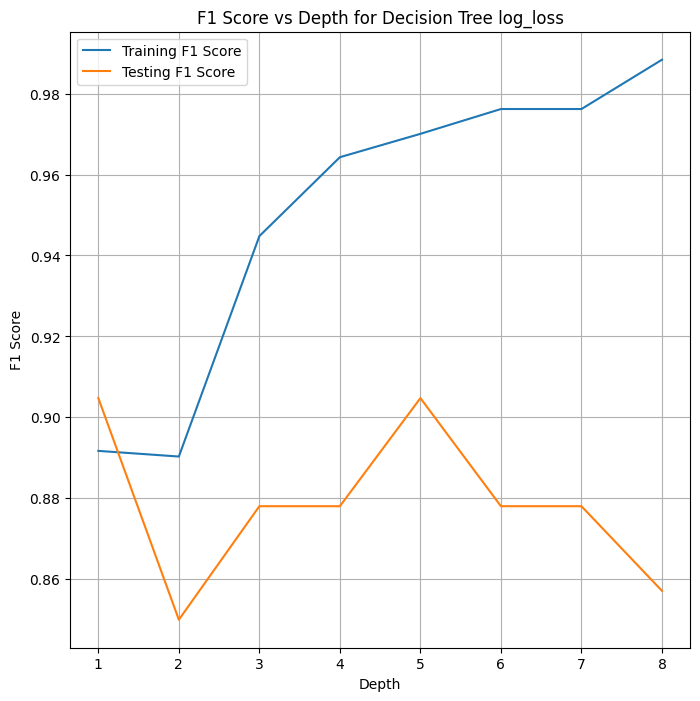

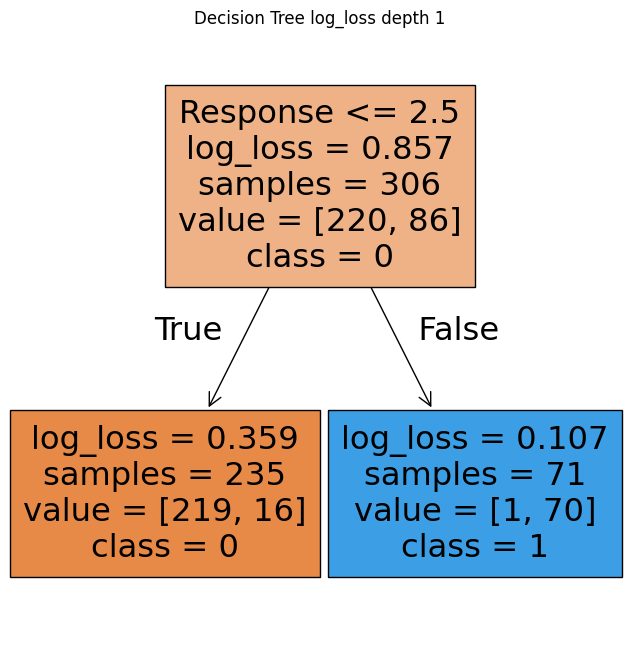

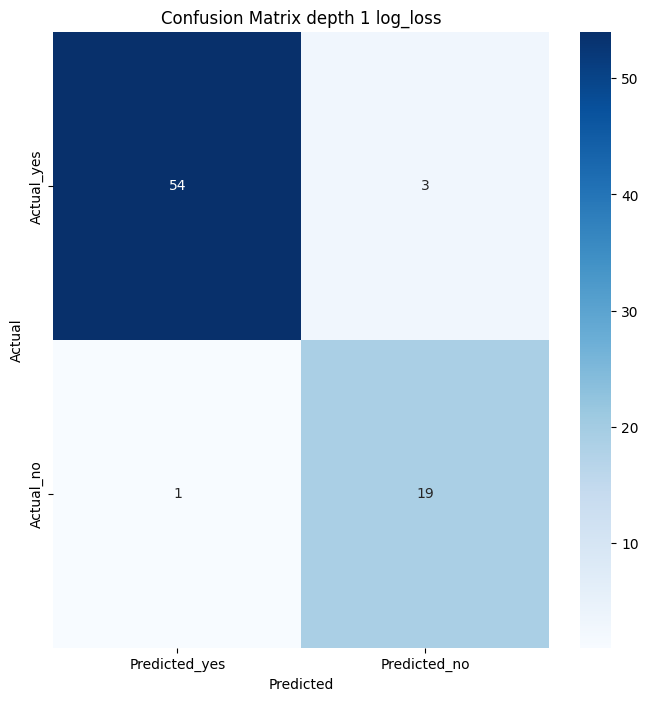

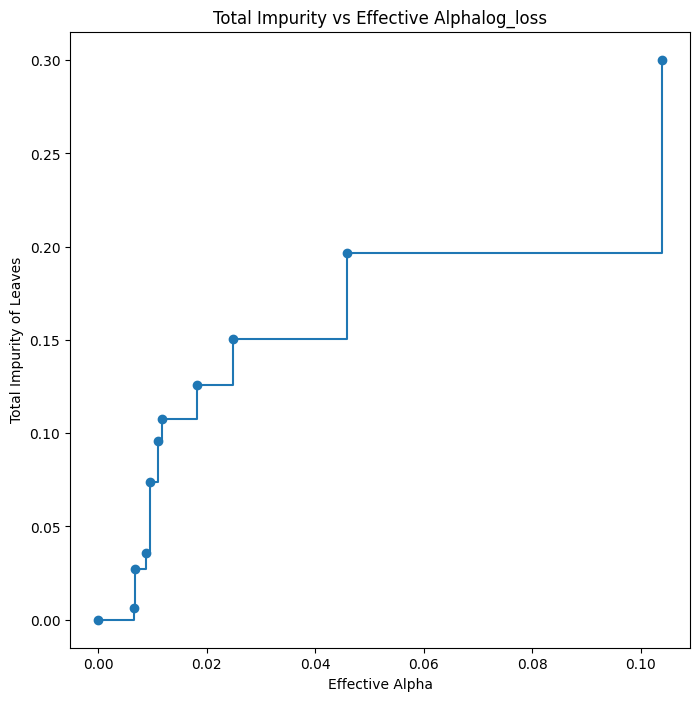

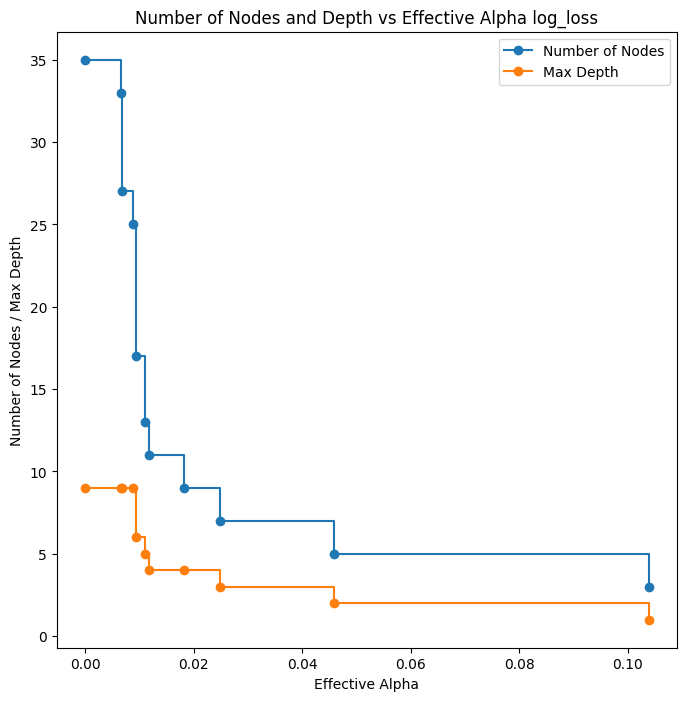

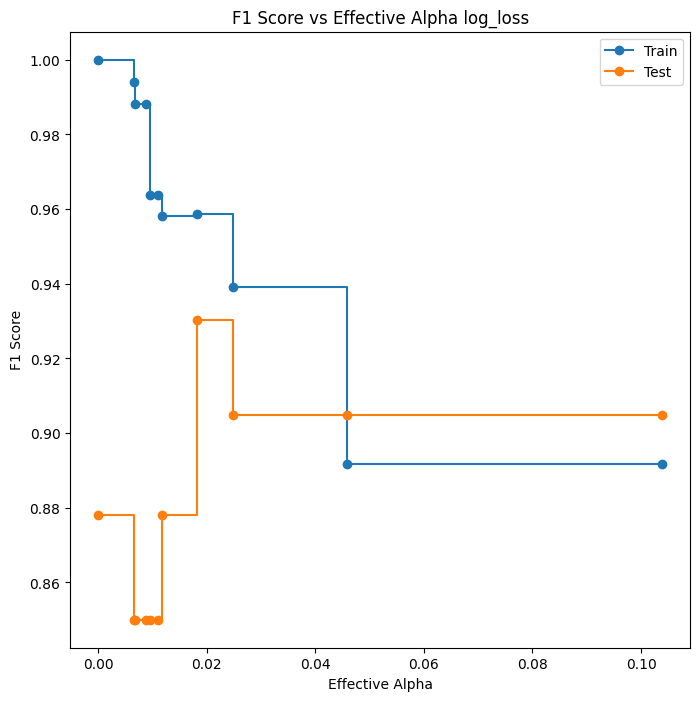

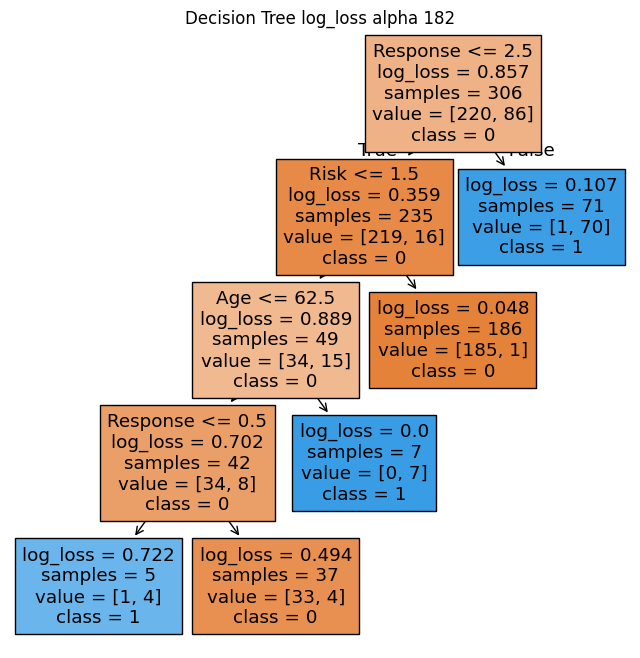

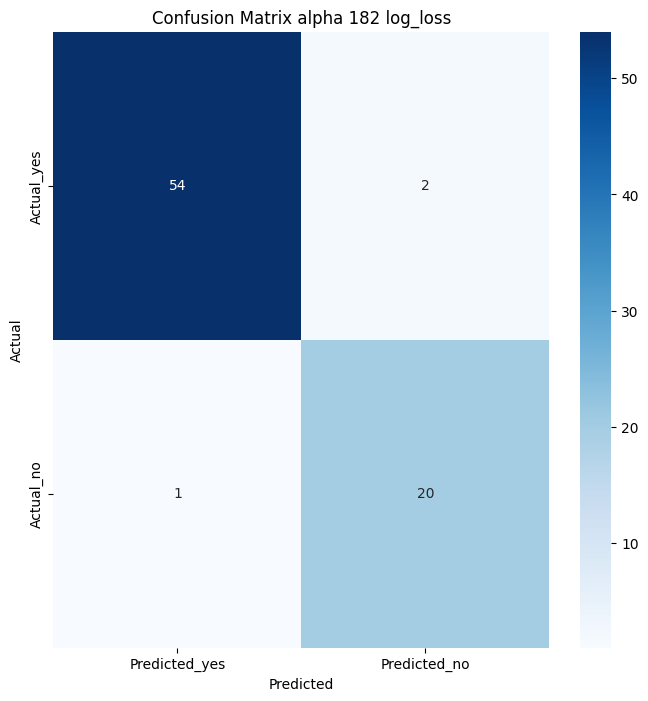


----------------------------------------------------------------------------------



In [279]:
plot_tree(savefig=False)

In [280]:
# Train a series of trees using different alpha values



In [281]:


# # Evaluate accuracy for each pruned tree
# train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
# test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# # Plot accuracy vs alpha
# plt.figure(figsize=(10, 6))
# plt.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='Train', drawstyle='steps-post')
# plt.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='Test', drawstyle='steps-post')
# plt.xlabel("Effective Alpha")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.title("Accuracy vs Effective Alpha")
# plt.show()


In [282]:
# # Plot the pruned decision tree
# from sklearn.tree import plot_tree

# # Select the optimal alpha with the best test score
# optimal_alpha = ccp_alphas[np.argmax(test_scores)]
# optimal_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
# optimal_clf.fit(X_train, y_train)

# # Print the optimal alpha and its corresponding accuracy
# plt.figure(figsize=(15, 10))
# class_names = [str(cls) for cls in model.classes_]
# tree.plot_tree(optimal_clf, feature_names=X.columns, class_names=class_names, filled=True)
# plt.title(f"Decision Tree {optimal_alpha}")
# plt.show()